### IMPORTS

In [1]:
from Inference import BBVI 

In [2]:
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
# load data
data = torch.load('data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [5]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=15, nb_layers=3, device=device)

In [7]:
Net.linear1.q_weight_mu.dtype

torch.float32

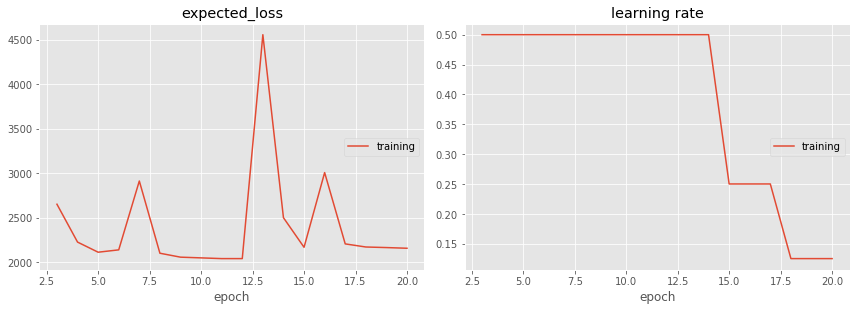

expected_loss:
training   (min: 2041.488, max: 28369.920, cur: 2157.802)

learning rate:
training   (min:    0.125, max:    0.500, cur:    0.125)


KeyboardInterrupt: 

In [10]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.5}
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 2, 'factor': 0.5}

voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.00001)
Net = voptimizer.run((x_data,y_data), n_epoch=10000, n_iter=50, n_ELBO_samples=20, plot=True)

In [11]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

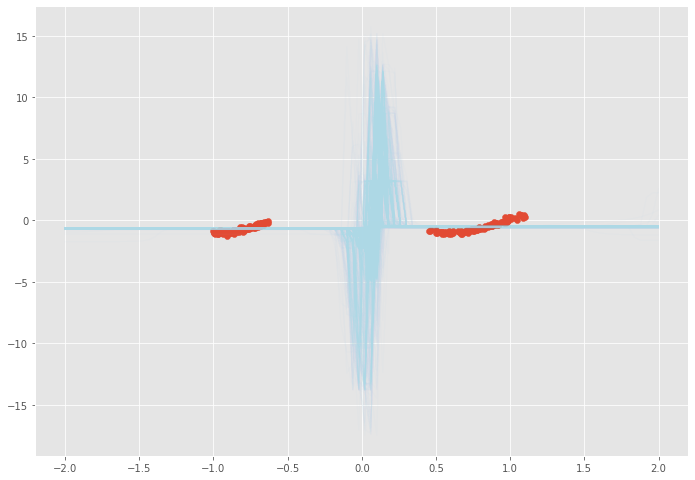

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')